# Perceptron
You should build an end-to-end machine learning pipeline using a perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) model.
- Optimize your pipeline by cross-validating your design decisions. 
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

### Import libraries

In [18]:
import pandas as pd
import sklearn.model_selection
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### Import dataset

In [8]:
mnist_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/mnist.csv')
mnist_db = mnist_db.set_index('id')
mnist_db.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into training and test set

In [9]:
df_train, df_test = sklearn.model_selection.train_test_split(mnist_db)

x_train = df_train.drop('class', axis=1)
y_train = df_train['class']
x_test = df_test.drop('class', axis=1)
y_test = df_test['class']

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (3000, 784)
y_train (3000,)
x_test (1000, 784)
y_test (1000,)


### Build a Perceptron ML pipeline

#### Define a grid

In [10]:
perceptron_grid = {'alpha':[0.001, 0.01, 0.1, 1], 'max_iter':[800, 1000, 1200]}

#### Conduct the grid search

In [11]:
# Create GridSearch CV object for Perceptron
perceptron_grid_object = sklearn.model_selection.GridSearchCV(Perceptron(), perceptron_grid, cv=5, error_score='raise')

# Fit the training set into the grid
perceptron_grid_object.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Perceptron(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'max_iter': [800, 1000, 1200]})

#### Evaluate best parameters

In [12]:
print('best_score Perceptron', perceptron_grid_object.best_score_)
print('best_params Perceptron', perceptron_grid_object.best_params_)
print('best_estimator Perceptron', perceptron_grid_object.best_estimator_)

best_score Perceptron 0.8486666666666668
best_params Perceptron {'alpha': 0.001, 'max_iter': 800}
best_estimator Perceptron Perceptron(alpha=0.001, max_iter=800)


### Evaluate the method

In [14]:
# With accuracy
y_predicted = perceptron_grid_object.predict(x_test)
accuracy = accuracy_score(y_test, y_predicted)
print('Accuracy', accuracy)

Accuracy 0.853


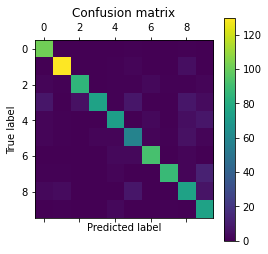

,0,1,2,3,4,5,6,7,8,9
0,102,0,0,0,0,1,0,0,1,0
1,0,130,0,0,1,2,0,0,5,0
2,2,1,85,0,1,1,3,1,1,2
3,8,0,6,75,1,8,0,0,8,4
4,2,1,0,0,73,0,3,0,5,8
5,2,1,0,2,2,58,2,1,6,2
6,0,0,0,0,3,3,92,0,2,0
7,1,1,0,0,2,0,0,88,2,12
8,3,4,0,0,0,8,0,0,75,7
9,0,1,0,0,3,0,0,1,0,75


In [17]:
# With Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(confusion_matrix(y_test, y_predicted))

In [19]:
# With precision, recall and f-score
class_report = classification_report(y_test, y_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       104
           1       0.94      0.94      0.94       138
           2       0.93      0.88      0.90        97
           3       0.97      0.68      0.80       110
           4       0.85      0.79      0.82        92
           5       0.72      0.76      0.74        76
           6       0.92      0.92      0.92       100
           7       0.97      0.83      0.89       106
           8       0.71      0.77      0.74        97
           9       0.68      0.94      0.79        80

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.87      0.85      0.85      1000

